# The magical universe of Harry Potter - Explainer notebook

# Index
* [1. Motivation](#motivation)<br>
* [2. Basic stats](#stats)<br>
    * [2.1 Data cleaning and preprocessing](#2-1-stats)<br>
        * [2.1.1 Wiki](#2-1-1-wiki)<br>
        * [2.1.2 Books](#2-1-2-books)<br>
        * [2.1.3 Scripts](#2-1-3-scripts)<br>
    * [2.2 Dataset stats](#2-2-stats)<br>
        * [2.2.1 Wiki](#2-2-1-wiki)<br>
        * [2.2.2 Books](#2-2-2-books)<br>
        * [2.2.3 Scripts](#2-2-3-scripts)<br>
* [3. Tools, theory and analysis](#tools)<br>
* [4. Discussion](#discussion)<br>
* [5. Contributions](#contributions)<br>
* [6. Appendices](#appendix)<br>
    * [6.1 Book textfiles - data cleaning and preprocessing](#6-1-book-cleaning)

<a id='motivation'></a>
# 1. Motivation

* **What is your dataset?**<br>
Svar
<br>

* **Why did you choose these particular datsets?**<br>
Svar
<br>

* **What was your goal for the end user's experience?**<br>
Svar
<br>

<a id='stats'></a>
# 2. Basic stats. Let's understand the dataset better

In [6]:
# Import necessary packages and functions
import random, math, pickle, itertools, nltk, re, pprint, pandas as pd, numpy as np, copy, seaborn as sns, matplotlib.pyplot as plt
from nltk import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud, ImageColorGenerator
%matplotlib inline
sns.set()

<a id='2-1-stats'></a>
## 2.1 Write about your choices in the data cleaning and preprocessing

<a id='2-1-1-wikis'></a>
### 2.1.1 Wikis

<a id='2-1-2books'></a>
### 2.1.2 Books
Before the text files could be used for analysis they had to be cleaned and preprocessed.
This process was twofold: Manual modification and data cleaning and preprocessing in Python.

**Manual modiciations to the textfiles**

Since the format of each book was different from the next, it was necessary to reformat some of the files before they could be read into Python.

As there are only seven files, it was believed to be simplest to modify the textfiles manually so that every file would have the same format. Otherwise a different read function would have been needed for each text file. Each original file was copied and the modifications applied to the 

The manual modifications done:
* The title of the book is displayed in the first line of the file
* Each chapter beginning is defined by a new line starting with 'CHAPTER'
* The chapter name of each chapter was in a seperate line
* Each text file ends with 'THE END' on a spereate line
* Apostrophes switched out in some file so they would be uniform in all the files

**Data cleaning and pre-processing**

Further data cleaning was done when each file was read from the modified text files. As the function is very long, the code and detailed explaination of it, was moved to the appendix [6.1 Book textfiles - data cleaning and preprocessing](#6-1-book-cleaning). A summary of the main points is provided here.

In order to store all of the information from the books a datastructure was defined.
The datastructure defined is a list of books, where each book is a dictionary containing the information about the book. Further nested in each book is a list of the chapters of the books. Each chapter is a dictionary containing the information about that specific chapter in the book.

The steps performed in the data cleaning and pre-processing function are as follow:
* All hypens are removed from the text. There is a specific reason for this, as the *Voldemort* character is oftened referred to as *he-who-must-not-be-named* and it was considered important to be able to analyize the frequency of this specific terms. If this would not have been done, the statement would have been split into six commonly occuring words.
* The text of each chapter was tokenized using the nltk.word_tokenize() function. This is done so that the long string of text can be split up into words.
* The tokenized list is filtered using the .isalpha() function along with a list of stopwords as defined by the nltk.corpus.stopwords.words('english') list of stopwords. This makes sure that the list only contains words, but all numbers, punctuation marks and common stopwords will be filtered out.
* Lastly the words left remaining where lemmetized using the nltk.WordNetLemmatizer() function. This means that each word will be stemmed so only the original form of the word will be displayed. This means that for example *women* will be converted to the singular form *woman*.

In [57]:
# Read the books from the pickled file
with open('actual_books/books_list.pkl', 'rb') as f:
    books = pickle.load(f)
print("Number of books: ", len(books))

Number of books:  7


Each book is a dictionary containing further information about the book. Such as:
* The book's number in the series
* The book's title
* The number of chapters
* All the text of the book
* All the words of the book after clean up (tokenizing, removing stopwords, lemmitazing)

An example of the data for the last book can be seen in the next cell.

In [59]:
# Display information for a single book
print("Book number: ", books[6]['book_nr'])
print("Book name: ", books[6]['title'])
print("Number of chapters: ", books[6]['nr_chapters'])
print("Length of original text (char-count)", len(books[6]['all_text']))
print("First text: ", books[6]['all_text'][:83])
print("Number of word objects after clean-up: ", books[6]['all_text_clean_length'])
print("First few word objects: ", books[6]['all_text_clean'][0:9])
print("Number of unique words (clean): ", len(set(books[6]['all_text_clean'])))

Book number:  7
Book name:  Harry Potter and the Deathly Hallows
Number of chapters:  36
Length of original text (char-count) 1127369
First text:  The two men appeared out of nowhere, a few yards apart in the narrow, moonlit lane.
Number of word objects after clean-up:  101455
First few word objects:  ['two', 'men', 'appeared', 'nowhere', 'yard', 'apart', 'narrow', 'moonlit', 'lane']
Number of unique words (clean):  10367


Each book also contains a dictionary containing the information about each chapter of the book. This was included so that sentiment analysis could be done for each chapter specifically, in order to see how the sentiment evolves over time in the books. 

An example of the data for the second chapter of the book can be seen in the cell below.

In [60]:
print("Title of the chapter: ", books[6]['chapters'][1]['chapter_name'])
print("Length of original text (char-count)", len(books[6]['chapters'][1]['chapter_text']))
print("First text of the chapter: ", books[6]['chapters'][1]['chapter_text'][0:87])
print("Number of word objects after clean-up: ", len(books[6]['chapters'][1]['chapter_text_clean']))
print("First few word objects: ", books[6]['chapters'][1]['chapter_text_clean'][0:8])

Title of the chapter:  In Memorandum
Length of original text (char-count) 23557
First text of the chapter:  Harry was bleeding. Clutching his right hand in his left and swearing under his breath,
Number of word objects after clean-up:  2090
First few word objects:  ['harry', 'bleeding', 'clutching', 'right', 'hand', 'left', 'swearing', 'breath']


<a id='2-1-3-scripts'></a>
### 2.1.3 Scripts

<a id='#2-2-stats'></a>
## 2.2 Write a short section that discusses the dataset stats (here you can recycle the work you did for Project Assignment A)

<a id='#2-2-1-wiki'></a>
### Wikis

<a id='#2-2-2-books'></a>
### Books
Blabla

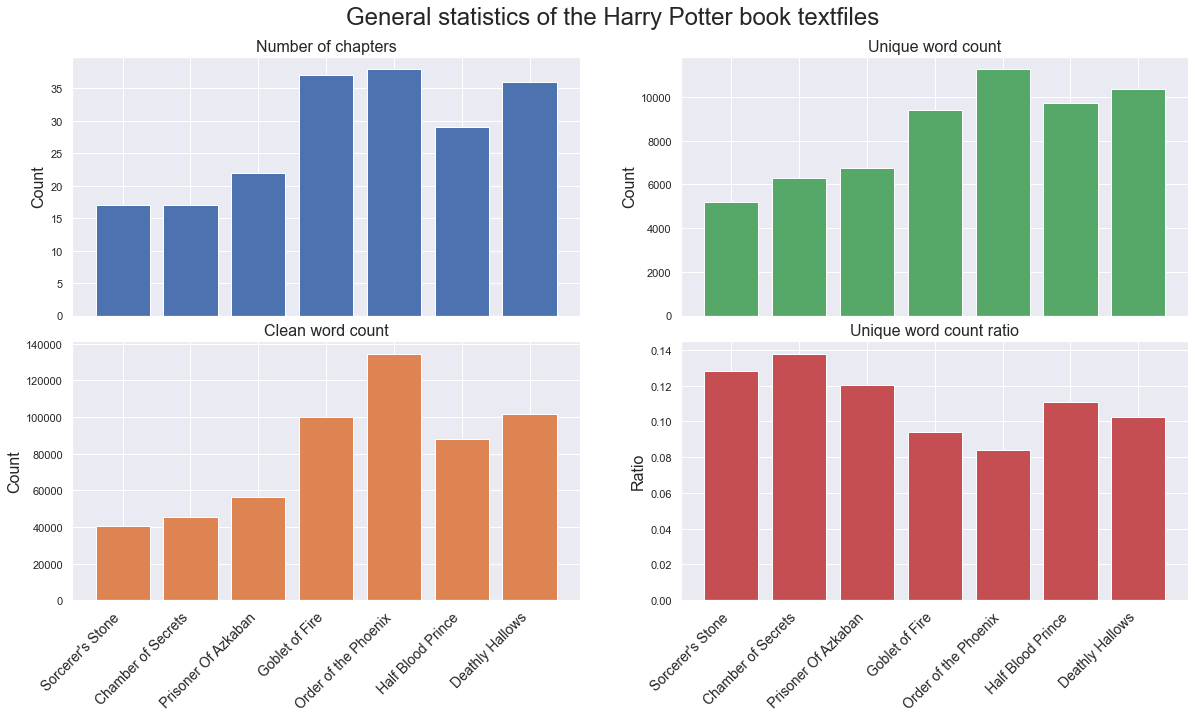

In [62]:
# Generate the data needed for the bar plots
names = [books[i]['title'] for i in range(len(books))] # Gather all the book names into a list
names_short = [books[i]['title'].split("Harry Potter and the ", 1)[1] for i in range(len(books))] # Gather the short version of the book names into a list
nr_chapters = [books[i]['nr_chapters'] for i in range(len(books))] # Get number of chapters for each book
word_count = [books[i]['all_text_clean_length'] for i in range(len(books))] # Word count for each book
unique_word_count = [len(set(books[i]['all_text_clean'])) for i in range(len(books))] # Unique word count fot each book
unique_word_count_ratio = [len(set(books[i]['all_text_clean']))/books[i]['all_text_clean_length'] for i in range(len(books))] # Calculate ratio for each book

# Plot a barplot of the dataset stats (2x2 subplot)
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(20,10), gridspec_kw={'hspace': 0.1})

palette = itertools.cycle(sns.color_palette())

axes[0][0].bar(names_short, nr_chapters, width = 0.8, color=next(palette))
axes[0][0].set_title('Number of chapters', fontsize=16)
axes[0][0].set_ylabel('Count', fontsize=16)

axes[1][0].bar(names_short, word_count, width = 0.8, color=next(palette))
axes[1][0].set_title('Clean word count', fontsize=16)
axes[1][0].set_ylabel('Count', fontsize=16)

axes[0][1].bar(names_short, unique_word_count, width = 0.8, color=next(palette))
axes[0][1].set_title('Unique word count', fontsize=16)
axes[0][1].set_ylabel('Count', fontsize=16)

axes[1][1].bar(names_short, unique_word_count_ratio, width = 0.8, color=next(palette))
axes[1][1].set_title('Unique word count ratio', fontsize=16)
axes[1][1].set_ylabel('Ratio', fontsize=16)

# Set the rotation and horizontal alignment of the x tick labels
plt.setp(axes[1][0].get_xticklabels(), rotation=45, ha="right", fontsize=14);
plt.setp(axes[1][1].get_xticklabels(), rotation=45, ha="right", fontsize=14);

# Set plot title
plt.suptitle('General statistics of the Harry Potter book textfiles', fontsize=24, y = 0.95);



From the above bar plot multiple interesting things can be seen
* 

<a id='#2-2-3-scripts'></a>
### Scripts

<a id='tools'></a>
# 3. Tools, theory and analysis. Describe the process of theory to insight
* **Talk about how you've worked with the text, including regular expressions, unicode, etc.**
* **Describe which network science tools and data analysis strategies you've used, how those network science measures work, and why the tools you've chosen are right for the problem you are solving.**
* **How did you use the tools to understand your dataset?**

Setup:

* Explain the overall idea
* Analysis step 1
    * Explain what you're interested in
    * Explain the tool
    * apply the tool
    * Discuss the outcome
* Analysis step 2
    * Explain what you're interested in
    * Explain the tool
    * apply the tool
    * Discuss the outcome
* Analysis step 3
    * Explain what you're interested in
    * Explain the tool
    * apply the tool
    * Discuss the outcome

<a id='discussion'></a>
# 4. Discussion. Think critically about your creation
* **What went well?**
* **What is still missing?**
* **What could be improved?**
* **Why?**

<a id='contributions'></a>
# 5. Contibutions. Who did what?
* **You should write (just briefly) which group memeber was the main responsible for which elements of the assignment. (I want you guys to understand every part of the assignment, but usually there is someone who took lead role in certain portions of the work. That's what you should explain.**
* **It is not OK to simply write "All group members contributed equally"**

<a id='index'></a>
# 6. Appendices

<a id='6-1-book-cleaning'></a>
## 6.1 Book textfiles - data cleaning and preprocessing

In [56]:
# Books source: http://www.glozman.com/textpages.html
# Book 2 source: https://github.com/formcept/whiteboard/blob/master/nbviewer/notebooks/data/harrypotter/Book%202%20-%20The%20Chamber%20of%20Secrets.txt

# Create a lemmatization object to use and stopwords
stopwords = nltk.corpus.stopwords.words('english')
wnl = nltk.WordNetLemmatizer()

# Initialize the datastructure to store all the information
books = []
text_from_all_books = """"""
clean_text_from_all_books = []

# Gather the filenames needed for the analysis
booknames = [
    "actual_books/Harry Potter 1 - Sorcerer's Stone FIXED.txt",
    "actual_books/Harry Potter 2 - Chamber of Secrets - FIXED.txt",
    "actual_books/Harry Potter 3 - The Prisoner Of Azkaban - FIXED.txt",
    "actual_books/Harry Potter 4 - The Goblet Of Fire - FIXED.txt",
    "actual_books/Harry Potter 5 - Order of the Phoenix - FIXED.txt",
    "actual_books/Harry Potter 6 - The Half Blood Prince - FIXED.txt",
    "actual_books/Harry Potter 7 - Deathly Hollows - FIXED.txt"
]

# Loop through each book 
for idx, name in enumerate(booknames):

    # Generate a new book dictionary
    book = {
        'title' : "",
        'book_nr' : idx+1,
        'nr_chapters' : 0,
        'chapters' : [],
        'all_text' : """""",
        'all_text_clean' : [],
        'all_text_clean_length' : 0
    }

    f = open(name, encoding="utf-8", errors='ignore')         # Open the file
    lines = f.readlines()                                     # Read all the lines
    lines = [line.rstrip() for line in lines if line != '\n'] # Skip empty rows and remove whitespace from the end

    # The first line contains the title of the book
    book['title'] = lines[0]

    # Find all the indexes where chapters start and the final one where the book ends
    chapter_starts_indexes = [lines.index(l) for l in lines if l.startswith('CHAPTER')]
    the_end_index = [lines.index(l) for l in lines if l.startswith('THE END')][0]

    # Extract the text and information about each chapter
    for i in range(len(chapter_starts_indexes)):

        chapter = {
            'chapter_name' : '',
            'chapter_text' : """""",
            'chapter_text_clean' : []
        }

        # increase the chapter count
        book['nr_chapters'] += 1

        # extract the chapter name
        chapter['chapter_name'] = lines[chapter_starts_indexes[i]+1]

        # If it is not the last chapter
        if i < len(chapter_starts_indexes)-1: 
            # Use a simple slice to select the lines of the text.
            text = lines[chapter_starts_indexes[i]+2:chapter_starts_indexes[i+1]]  
        else:
            # Get all the text for the index slice until the end index
            text = lines[chapter_starts_indexes[i]+2:the_end_index] 

        # Clean up the text and merge it into a single string
        text = ' '.join(str(t) for t in text)
        text = text.replace('- ', '') # Done to account for the he- who- must- not- be- named case
        text = text.replace('-', '') # Done to account for the he-who-must-not-be-named case
        text = text.replace('’', "'") # Here we switch out this specific apostrophe for a general one
        chapter['chapter_text'] = text # Add the text to the dictionary

        # Tokenize the words, make everything lowercase and skip punctuation and common stopwords
        tokens = nltk.word_tokenize(text)
        words = [w.lower() for w in tokens if w.isalpha()]
        lem_words = [wnl.lemmatize(w) for w in words if w not in stopwords]  # Lemmatize the words and skip stopwords

        # Add the lemmetized information 
        chapter['chapter_text_clean'] = lem_words

        # Add the information to the dictionary
        book['chapters'].append(chapter)
        book['all_text'] = book['all_text'] + text
        book['all_text_clean'].extend(lem_words)
        

    # Add the book to the list of books
    book['all_text_clean_length'] = len(book['all_text_clean'])
    
    # Finally append the book to the books list
    books.append(book)

    # Append the text to the string containing all the books
    text_from_all_books = text_from_all_books + text
    clean_text_from_all_books.extend(book['all_text_clean'])
    
# Save the list of books to a file
with open('actual_books/books_list.pkl', 'wb') as f:
    pickle.dump(books, f)